## Amazon Book Reviews Part V: Review Text Length and Helpfulness

#### This is the 5-core dataset which means that each user and item has at least 5 reviews. The dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/. 

### Introduction

How the length of reviews relates to helpfulness ratings?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
query1 = "SELECT reviewerID, wordLength, percHelpful FROM amazon_book_small.help_length \
WHERE unixReviewTime >= '1996-01-01 00:00:00 UTC' AND unixReviewTime < '2012-01-01 00:00:00 UTC'"

In [3]:
project_id = 'dotted-chiller-156222'

In [4]:
da = gbq.read_gbq(query1, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.67 s. Waiting...
Query done.
Processed: 305.6 Mb

Retrieving results...
  Got page: 1; 4.0% done. Elapsed 22.91 s.
  Got page: 2; 7.0% done. Elapsed 29.41 s.
  Got page: 3; 11.0% done. Elapsed 35.53 s.
  Got page: 4; 14.0% done. Elapsed 41.7 s.
  Got page: 5; 18.0% done. Elapsed 47.99 s.
  Got page: 6; 22.0% done. Elapsed 54.15 s.
  Got page: 7; 25.0% done. Elapsed 59.69 s.
  Got page: 8; 29.0% done. Elapsed 66.72 s.
  Got page: 9; 33.0% done. Elapsed 73.66 s.
  Got page: 10; 36.0% done. Elapsed 79.25 s.
  Got page: 11; 40.0% done. Elapsed 84.63 s.
  Got page: 12; 43.0% done. Elapsed 91.5 s.
  Got page: 13; 47.0% done. Elapsed 97.45 s.
  Got page: 14; 51.0% done. Elapsed 103.04 s.
  Got page: 15; 54.0% done. Elapsed 110.43 s.
  Got page: 16; 58.0% done. Elapsed 116.28 s.
  Got page: 17; 61.0% done. Elapsed 123.35 s.
  Got page: 18; 65.0% done. Elapsed 129.86 s.
  Got page: 19; 69.0% done. Elapsed 135.9 s.
  Got page: 20; 72.0% done.

In [5]:
da.head(1)

,reviewerID,wordLength,percHelpful
0,A1JZUDW8JE16GN,154,0.75


In [5]:
query2 = "SELECT reviewerID, wordLength, percHelpful FROM amazon_book_small.help_length \
WHERE unixReviewTime >= '2012-01-02 00:00:00 UTC' AND unixReviewTime < '2013-06-01 00:00:00 UTC'"

In [6]:
db = gbq.read_gbq(query2, project_id=project_id)

Requesting query... ok.
Query running...
  Elapsed 11.06 s. Waiting...
Query done.
Processed: 305.6 Mb

Retrieving results...
  Got page: 1; 4.0% done. Elapsed 25.21 s.
  Got page: 2; 8.0% done. Elapsed 31.2 s.
  Got page: 3; 12.0% done. Elapsed 36.22 s.
  Got page: 4; 17.0% done. Elapsed 40.84 s.
  Got page: 5; 21.0% done. Elapsed 46.79 s.
  Got page: 6; 25.0% done. Elapsed 51.93 s.
  Got page: 7; 29.0% done. Elapsed 58.23 s.
  Got page: 8; 33.0% done. Elapsed 66.12 s.
  Got page: 9; 37.0% done. Elapsed 73.14 s.
  Got page: 10; 41.0% done. Elapsed 78.36 s.
  Got page: 11; 45.0% done. Elapsed 84.66 s.
  Got page: 12; 50.0% done. Elapsed 90.71 s.
  Got page: 13; 54.0% done. Elapsed 96.24 s.
  Got page: 14; 58.0% done. Elapsed 101.33 s.
  Got page: 15; 62.0% done. Elapsed 106.92 s.
  Got page: 16; 66.0% done. Elapsed 112.62 s.
  Got page: 17; 70.0% done. Elapsed 117.25 s.
  Got page: 18; 74.0% done. Elapsed 123.81 s.
  Got page: 19; 78.0% done. Elapsed 129.56 s.
  Got page: 20; 83.0% don

In [8]:
db.head(1)

,reviewerID,wordLength,percHelpful
0,A1B4Y4I72624Y3,30,0.0


In [7]:
query3 = "SELECT reviewerID, wordLength, percHelpful FROM amazon_book_small.help_length \
WHERE unixReviewTime >= '2013-06-02 00:00:00 UTC' AND unixReviewTime < '2015-01-01 00:00:00 UTC'"

In [9]:
dc = gbq.read_gbq(query3, project_id=project_id)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
  Got page: 2; 5.0% done. Elapsed 13.27 s.
  Got page: 3; 8.0% done. Elapsed 18.83 s.
  Got page: 4; 11.0% done. Elapsed 24.01 s.
  Got page: 5; 14.0% done. Elapsed 29.68 s.
  Got page: 6; 16.0% done. Elapsed 36.42 s.
  Got page: 7; 19.0% done. Elapsed 41.37 s.
  Got page: 8; 22.0% done. Elapsed 48.33 s.
  Got page: 9; 24.0% done. Elapsed 53.28 s.
  Got page: 10; 27.0% done. Elapsed 60.38 s.
  Got page: 11; 30.0% done. Elapsed 65.09 s.
  Got page: 12; 32.0% done. Elapsed 70.4 s.
  Got page: 13; 35.0% done. Elapsed 75.26 s.
  Got page: 14; 38.0% done. Elapsed 80.3 s.
  Got page: 15; 41.0% done. Elapsed 85.72 s.
  Got page: 16; 43.0% done. Elapsed 93.4 s.
  Got page: 17; 46.0% done. Elapsed 99.03 s.
  Got page: 18; 49.0% done. Elapsed 107.19 s.
  Got page: 19; 51.0% done. Elapsed 114.48 s.
  Got page: 20; 54.0% done. Elapsed 119.45 s.
  Got page: 21; 57.0% done. Elapsed 125.45 s.
  Got page: 22; 59.0% 

In [11]:
dc.head(1)

,reviewerID,wordLength,percHelpful
0,A38WRXQZ4NFBKA,99,NaN


In [10]:
df = pd.concat([da, db, dc])
df.head(1)

,reviewerID,wordLength,percHelpful
0,AP2GQVQC1DZ5Q,158,0.0


In [13]:
df.shape

(8887428, 3)

In [11]:
df = df.fillna(0)

In [17]:
df.describe()

,wordLength,percHelpful
count,8.887428e+06,8.887428e+06
mean,1.467921e+02,3.929544e-01
std,1.798455e+02,4.439968e-01
min,1.000000e+00,0.000000e+00
25%,3.600000e+01,0.000000e+00
50%,8.000000e+01,0.000000e+00
75%,1.890000e+02,1.000000e+00
max,6.203000e+03,1.000000e+00


In [18]:
df.corr()

,wordLength,percHelpful
wordLength,1.000000,0.237344
percHelpful,0.237344,1.000000


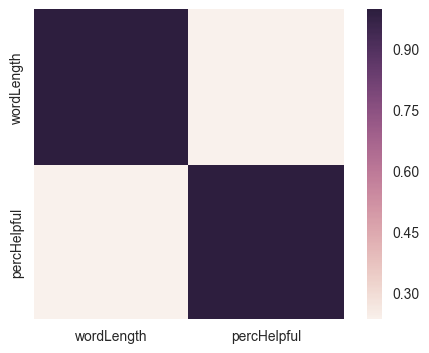

In [20]:
sns.heatmap(df.corr(), square=True)

Text length and helpfulness is weakly correlated.

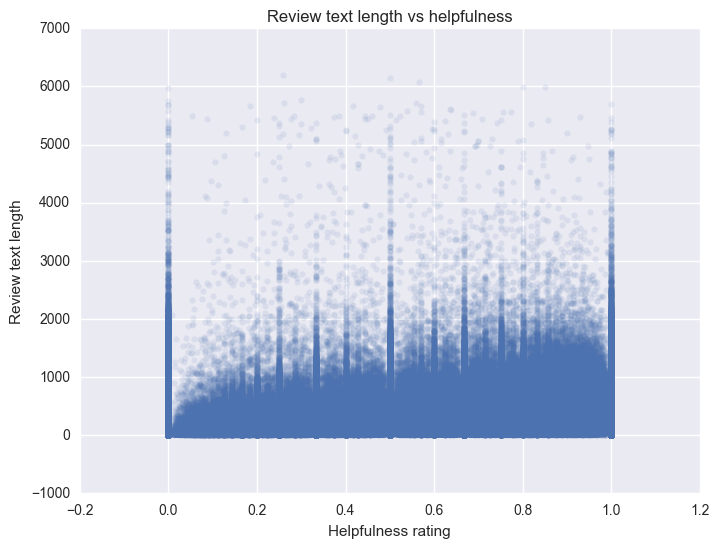

In [23]:
plt.figure(figsize=[8, 6])
sns.regplot(x = 'percHelpful', y = 'wordLength', data = df, scatter_kws={'alpha':0.1}, fit_reg= False)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review text length')
plt.title('Review text length vs helpfulness')

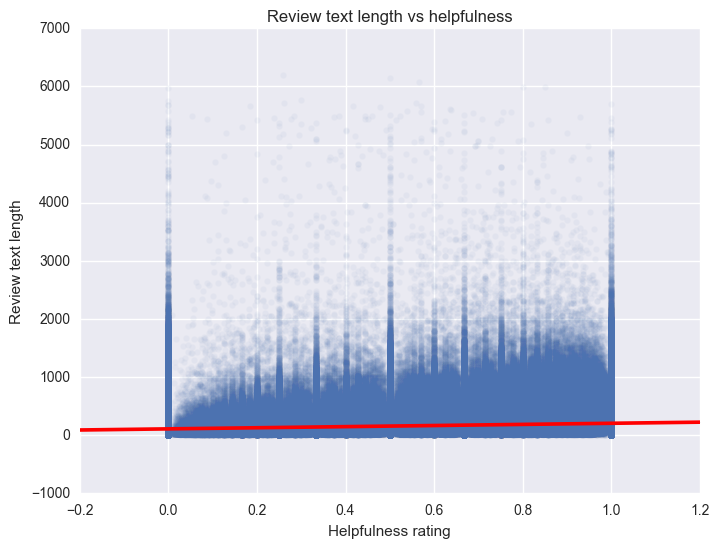

In [12]:
plt.figure(figsize=[8, 6])
sns.regplot(x = 'percHelpful', y = 'wordLength', data = df, scatter_kws={'alpha':0.05}, fit_reg= True, line_kws= {'color':'red'})
plt.xlabel('Helpfulness rating')
plt.ylabel('Review text length')
plt.title('Review text length vs helpfulness')

Scatter plot is not very helpful with 9 million data points but shows some positive correlation. It means that longer text length relates to a higher helpfulness rating.

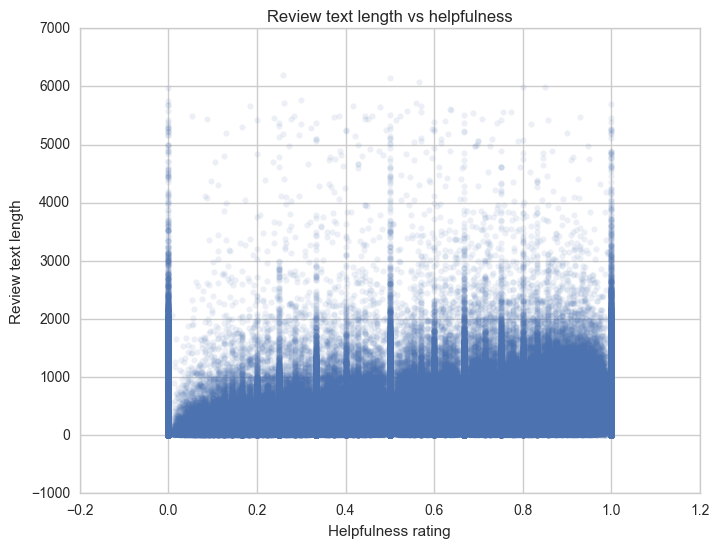

In [27]:
sns.set_style("whitegrid")
plt.figure(figsize=[8, 6])
sns.regplot(x = 'percHelpful', y = 'wordLength', data = df, scatter_kws={'alpha':0.1}, fit_reg= False)
plt.xlabel('Helpfulness rating')
plt.ylabel('Review text length')
plt.title('Review text length vs helpfulness')

### Hexbin plot

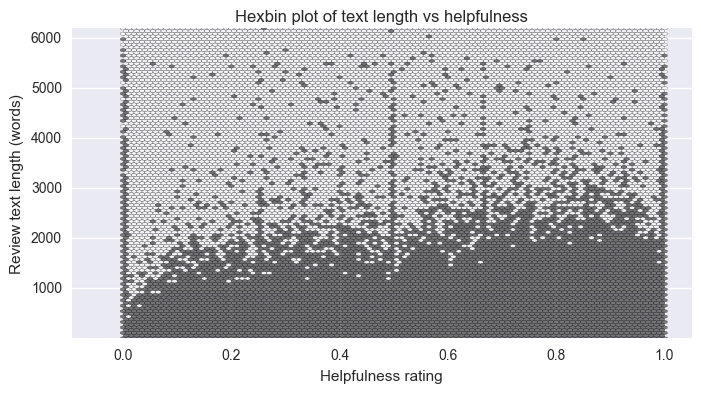

In [94]:
plt.figure(figsize=[8, 4])
plt.hexbin(x=df.percHelpful, y=df.wordLength, color='k', bins = 2, alpha = 0.5)
plt.xlim(-.095, 1.05)
plt.xlabel('Helpfulness rating')
#plt.ylim([0, 2500])
plt.ylabel('Review text length (words)')
plt.title('Hexbin plot of text length vs helpfulness')

Not much information - weakly correlated. 

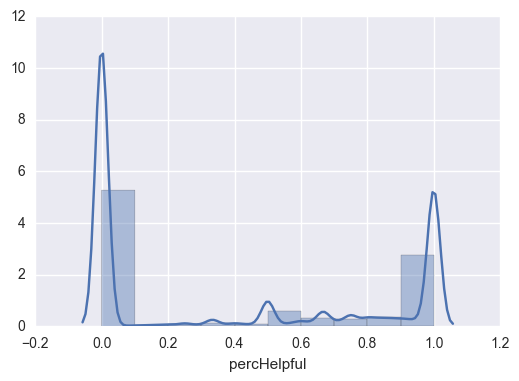

In [95]:
sns.distplot(df.percHelpful, bins = 10)

### How long people tend to write?

In [13]:
dr = df[['reviewerID', 'wordLength']]
dr.head(1)

,reviewerID,wordLength
0,AP2GQVQC1DZ5Q,158


In [14]:
bins = [-.09, 100, 200, 500, 750, 1000, 2000, 4000, 6500]
bins

[-0.09, 100, 200, 500, 750, 1000, 2000, 4000, 6500]

In [15]:
group_names1 = ['0-100', '101-200', '201-500', '501-750', '751-1000', '1000-2000', '2000-4000', '4000-6500']

In [16]:
dr['category'] = pd.cut(dr['wordLength'], bins, labels=group_names1)
dr.head(1)

,reviewerID,wordLength,category
0,AP2GQVQC1DZ5Q,158,101-200


In [17]:
pd.value_counts(dr['category'])

0-100        5078861
101-200      1723395
201-500      1667330
501-750       291255
751-1000       82703
1000-2000      40842
2000-4000       2741
4000-6500        301
Name: category, dtype: int64

(0, 5500000)

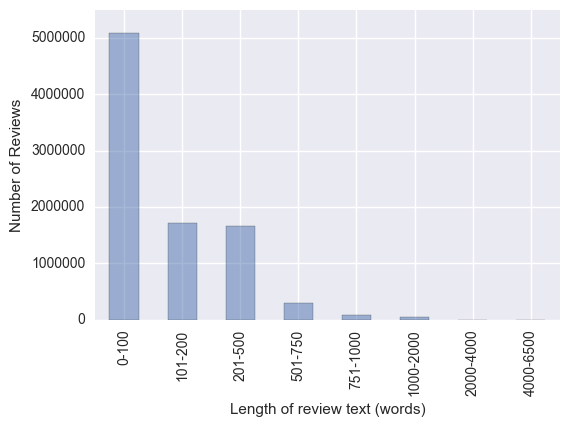

In [21]:
sns.set_style("darkgrid")
pd.value_counts(dr['category']).plot(kind='bar', alpha = 0.5)
plt.xlabel('Length of review text (words)')
plt.ylabel('Number of Reviews')
plt.ylim([0, 5500000])

A large number of reviews are within 0-500 words. If we consider 500 words are raoughly one paragraph - it makes sesne.

In [28]:
bins1 = [-.09, .25, 0.5, .75, 1.01 ]
bins1

[-0.09, 0.25, 0.5, 0.75, 1.01]

In [29]:
group_names1 = ['below 25%', '25-50%', '51-75%', '76-100%']

In [30]:
df['category'] = pd.cut(df['percHelpful'], bins1, labels=group_names1)
df.head(1)

,reviewerID,wordLength,percHelpful,category
0,AP2GQVQC1DZ5Q,158,0.0,below 25%


In [50]:
pd.value_counts(df['category'])

below 25%    4791077
76-100%      2848104
25-50%        638312
51-75%        609935
Name: category, dtype: int64

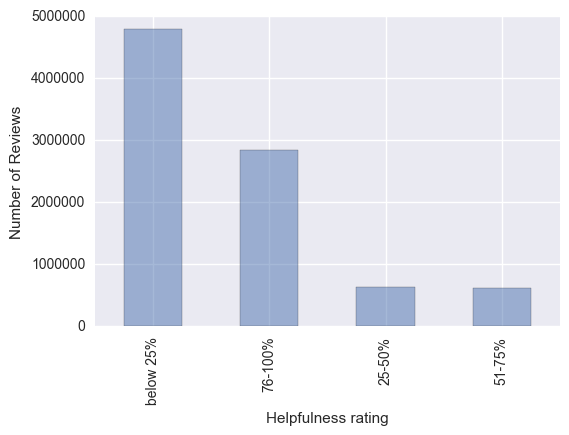

In [51]:
pd.value_counts(df['category']).plot(kind='bar', alpha = 0.5)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')

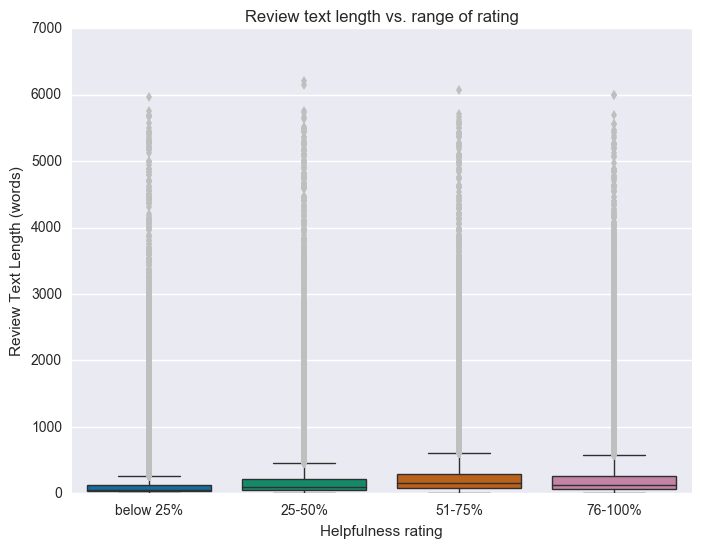

In [38]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
flierprops = dict(markerfacecolor='0.75', markersize=5,
              linestyle='none')
sns.boxplot(y="wordLength", x="category", data=df, palette="colorblind", linewidth= 1, flierprops = flierprops)
sns.despine(left=True)
#plt.ylim([-100, 6500])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')

Even though some long reviews have been written, 75% of all reviews are within 500 words in all helpfulness range. 

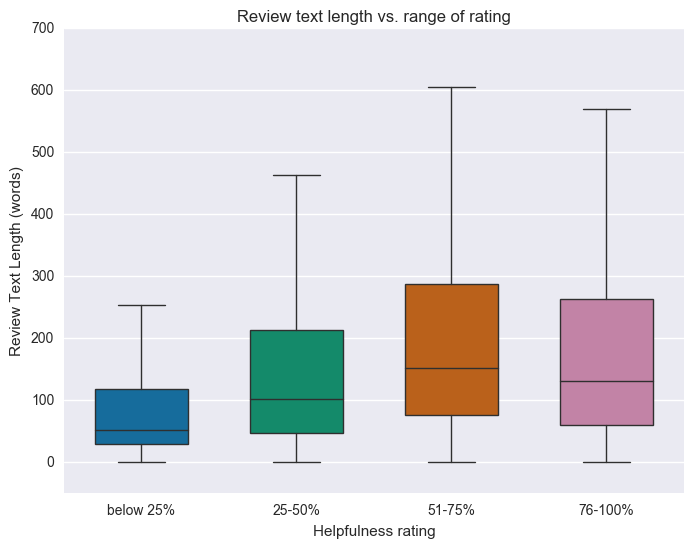

In [43]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
sns.boxplot(y="wordLength", x="category", data=df, palette="colorblind", linewidth= 1, showfliers=False, width = 0.6 )
sns.despine(left=True)
plt.ylim([-50, 700])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')

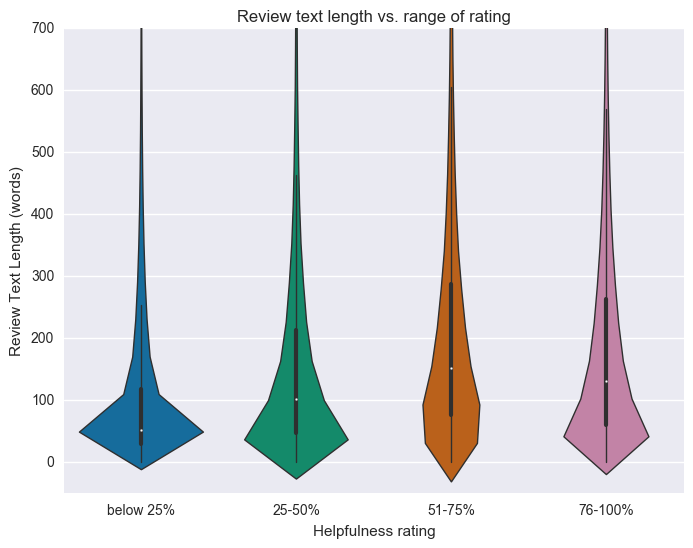

In [49]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
sns.violinplot(y="wordLength", x="category", data=df, palette="colorblind", linewidth= 1)
sns.despine(left=True)
plt.ylim([-50, 700])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')

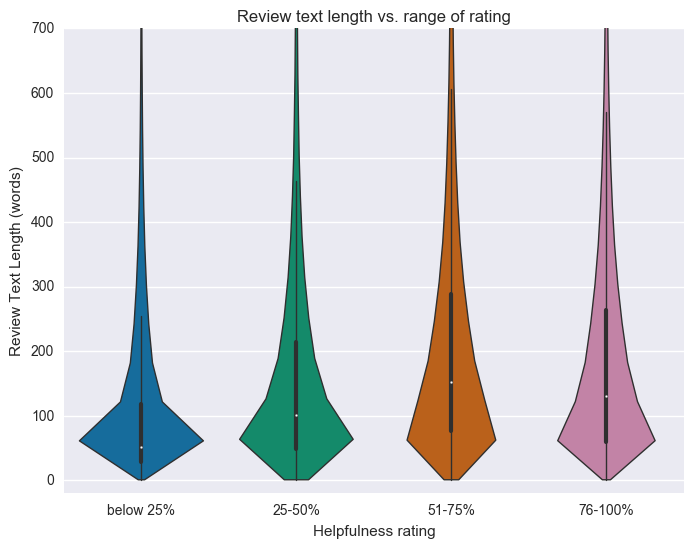

In [51]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
sns.violinplot(y="wordLength", x="category", data=df, palette="colorblind", cut = 0, linewidth= 1, showfliers=False)
sns.despine(left=True)
plt.ylim([-20, 700])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')